<a href="https://colab.research.google.com/github/Shoutaa/Pengolahan-Citra-_UAS/blob/main/Canny_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

Tujuan: Menghubungkan Google Drive ke Google Colab agar data (gambar) yang tersimpan di Google Drive dapat diakses langsung dari Colab.

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Library

1. cv2 (OpenCV) → Untuk membaca, memproses, dan menganalisis gambar.
2. numpy → Untuk operasi numerik seperti perhitungan piksel dan array gambar.
3. os → Untuk menangani file dan direktori dalam sistem.
4. matplotlib.pyplot → Untuk menampilkan gambar dalam bentuk grafik.

In [14]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt



# Fungsi Preprocessing Gambar



1. cv2.imread(image_path): Membaca gambar dari path yang diberikan.
2. cv2.cvtColor(image, cv2.COLOR_BGR2GRAY): Mengonversi gambar BGR (default format OpenCV) ke grayscale.
3. cv2.resize(gray_image, target_size): Mengubah ukuran gambar menjadi ukuran yang ditentukan (default 256x256).
4. cv2.threshold(): Mengonversi gambar grayscale ke biner berdasarkan ambang batas yang ditentukan (127 di sini).

In [15]:
def preprocess_image(image_path, target_size=(256, 256)):
    image = cv2.imread(image_path)  # Membaca gambar
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Mengonversi gambar ke grayscale
    resized_image = cv2.resize(gray_image, target_size)  # Mengubah ukuran gambar
    _, binary_image = cv2.threshold(resized_image, 127, 255, cv2.THRESH_BINARY)  # Threshold untuk mendapatkan citra biner
    return resized_image, binary_image


# Fungsi Deteksi Tepi Canny

1. Mengambil nilai median piksel dari gambar biner untuk menentukan ambang batas (threshold) secara otomatis.
2. Lower threshold: 66% dari nilai median piksel.
3. Upper threshold: 133% dari nilai median piksel.
4. Algoritma Canny bekerja dengan menyaring tepi gambar menggunakan ambang batas yang sudah ditentukan.
5. Hasilnya adalah gambar dengan tepi berwarna putih (255) dan latar belakang hitam (0).

In [16]:
def canny_edge_detection(binary_image):
    median_pixel = np.median(binary_image)  # Menghitung nilai median dari gambar biner
    lower_threshold = int(max(0, 0.66 * median_pixel))  # Ambang batas bawah
    upper_threshold = int(min(255, 1.33 * median_pixel))  # Ambang batas atas
    edges = cv2.Canny(binary_image, lower_threshold, upper_threshold)  # Deteksi tepi menggunakan Canny
    return edges


# Fungsi Perhitungan Akurasi

1. ref_image == test_image: Membandingkan setiap piksel gambar referensi dan gambar uji.
2. np.sum(): Menghitung jumlah piksel yang cocok.
3. accuracy: Persentase kesesuaian piksel antara gambar referensi dan uji.

In [17]:
def calculate_accuracy(ref_image, test_image):
    matching_pixels = np.sum(ref_image == test_image)  # Menghitung jumlah piksel yang cocok
    total_pixels = ref_image.size  # Total jumlah piksel dalam gambar
    accuracy = (matching_pixels / total_pixels) * 100  # Menghitung persentase akurasi
    return accuracy


# Fungsi Perbandingan Gambar

Fungsi utama yang akan melakukan komparasi antara gambar referensi dan gambar uji, menghitung akurasi, menyimpan hasil gambar dengan deteksi tepi, serta menampilkan visualisasi gambar.

1. os.makedirs(output_folder, exist_ok=True): Membuat folder untuk menyimpan hasil output.
2. os.listdir(reference_folder): Menyaring gambar dari folder referensi dan uji.
3. zip(): Mengiterasi gambar referensi dan gambar uji secara bersamaan.
4. cv2.imwrite(output_path, test_edges): Menyimpan gambar hasil deteksi tepi.
5. plt.imshow(): Menampilkan visualisasi gambar.

In [18]:
def compare_images(reference_folder, test_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)  # Membuat folder output jika belum ada
    reference_images = sorted([os.path.join(reference_folder, f) for f in os.listdir(reference_folder) if f.endswith('.jpg')])
    test_images = sorted([os.path.join(test_folder, f) for f in os.listdir(test_folder) if f.endswith('.jpg')])

    accuracies = []  # Menyimpan akurasi untuk setiap gambar
    for ref_img, test_img in zip(reference_images, test_images):
        ref_gray, ref_binary = preprocess_image(ref_img)  # Pra-proses gambar referensi
        test_gray, test_binary = preprocess_image(test_img)  # Pra-proses gambar uji

        ref_edges = canny_edge_detection(ref_binary)  # Deteksi tepi gambar referensi
        test_edges = canny_edge_detection(test_binary)  # Deteksi tepi gambar uji

        accuracy = calculate_accuracy(ref_edges, test_edges)  # Menghitung akurasi
        accuracies.append(accuracy)

        print(f'Akurasi antara {os.path.basename(ref_img)} dan {os.path.basename(test_img)}: {accuracy:.2f}%')

        # Menyimpan gambar hasil deteksi tepi
        output_filename = f"canny_{os.path.basename(ref_img).split('.')[0]}_with_{os.path.basename(test_img).split('.')[0]}.jpg"
        output_path = os.path.join(output_folder, output_filename)
        cv2.imwrite(output_path, test_edges)

        # Menampilkan visualisasi gambar
        plt.figure(figsize=(8, 5))
        plt.subplot(2, 2, 1)
        plt.title('Referensi (Gray)')
        plt.imshow(ref_gray, cmap='gray')
        plt.axis("off")

        plt.subplot(2, 2, 2)
        plt.title('Uji (Gray)')
        plt.imshow(test_gray, cmap='gray')
        plt.axis("off")

        plt.subplot(2, 2, 3)
        plt.title('Referensi (Edges)')
        plt.imshow(ref_edges, cmap='gray')
        plt.axis("off")

        plt.subplot(2, 2, 4)
        plt.title('Uji (Edges)')
        plt.imshow(test_edges, cmap='gray')
        plt.axis("off")

        plt.tight_layout()
        plt.show()

    # Menghitung rata-rata akurasi
    average_accuracy = np.mean(accuracies)
    print(f'Rata-rata Akurasi: {average_accuracy:.2f}%')


# Menjalankan Perbandingan Gambar

1. Folder referensi dan uji adalah folder yang berisi gambar yang akan dibandingkan.
2. Folder output adalah tempat di mana hasil gambar deteksi tepi disimpan.

Akurasi antara Alexandra Daddario_28.jpg dan Alexandra Daddario_13.jpg: 93.94%


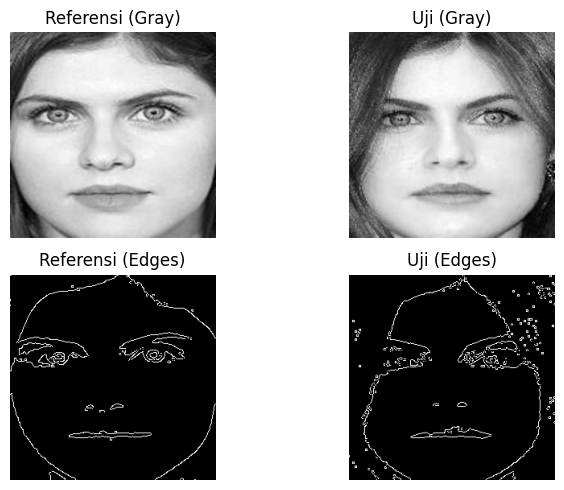

Akurasi antara Andy Samberg_39.jpg dan Andy Samberg_39.jpg: 100.00%


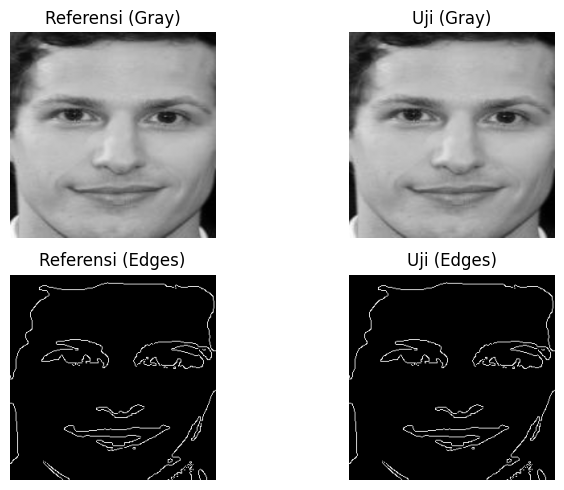

Akurasi antara Billie Eilish_41.jpg dan Billie Eilish_41.jpg: 100.00%


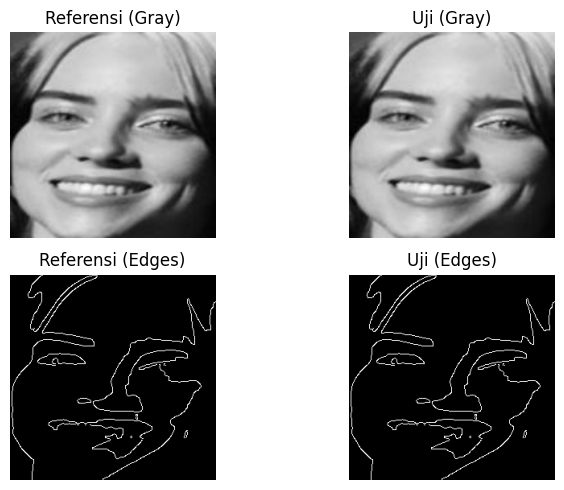

Akurasi antara Brad Pitt_16.jpg dan Brad Pitt_16.jpg: 100.00%


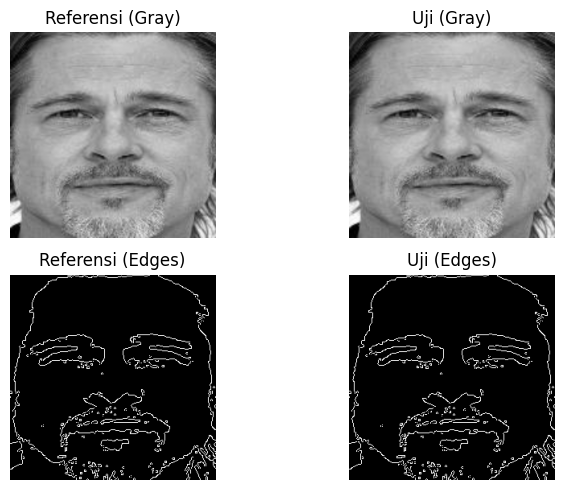

Akurasi antara Camila Cabello_3.jpg dan Camila Cabello_3.jpg: 100.00%


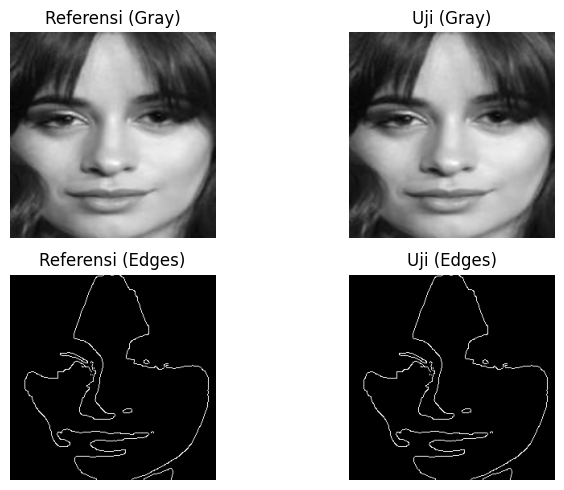

Akurasi antara Claire Holt_17.jpg dan Claire Holt_17.jpg: 100.00%


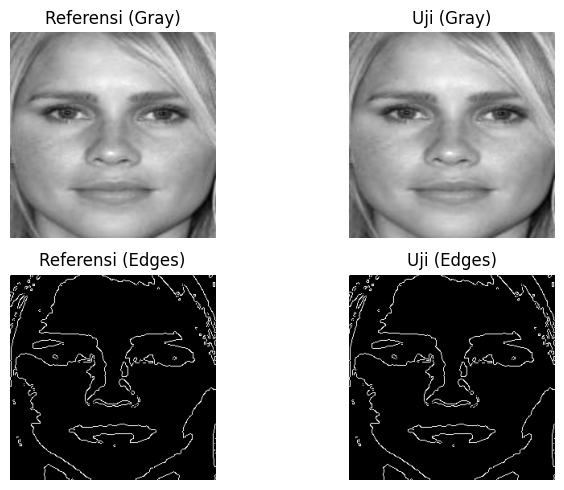

Akurasi antara Courtney Cox_24.jpg dan Courtney Cox_24.jpg: 100.00%


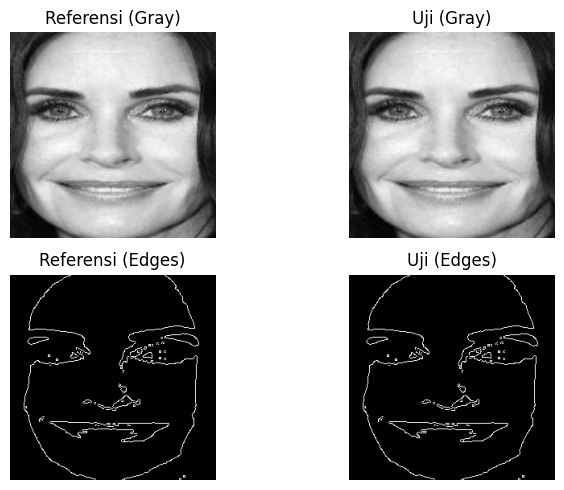

Akurasi antara Dwayne Johnson_33.jpg dan Dwayne Johnson_33.jpg: 100.00%


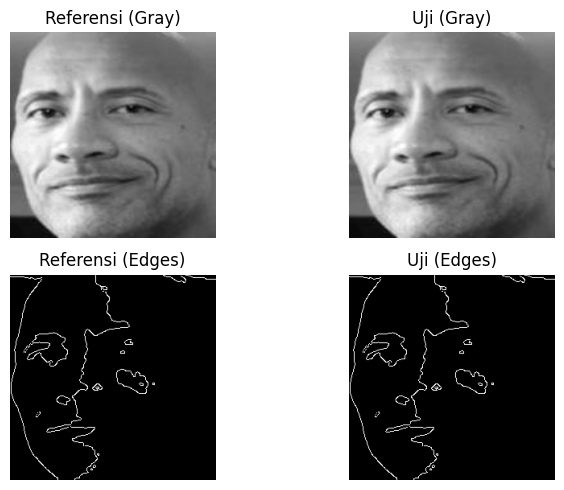

Akurasi antara Elizabeth Olsen_20.jpg dan Elizabeth Olsen_45.jpg: 94.27%


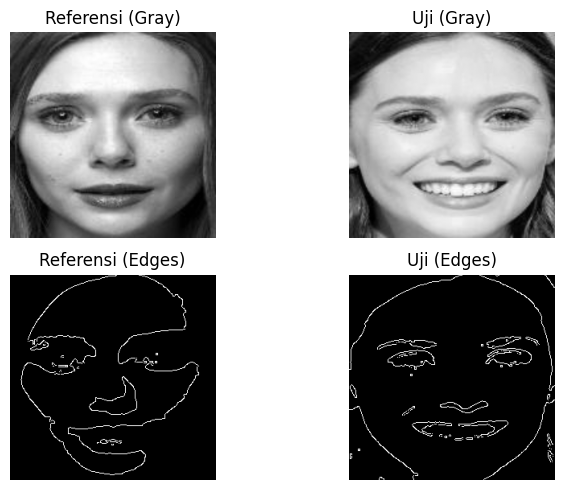

Akurasi antara Ellen Degeneres_1.jpg dan Ellen Degeneres_1.jpg: 100.00%


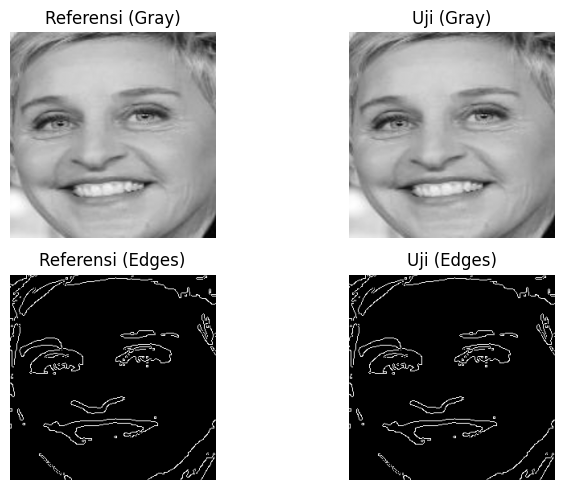

Akurasi antara Henry Cavill_3.jpg dan Henry Cavill_102.jpg: 92.92%


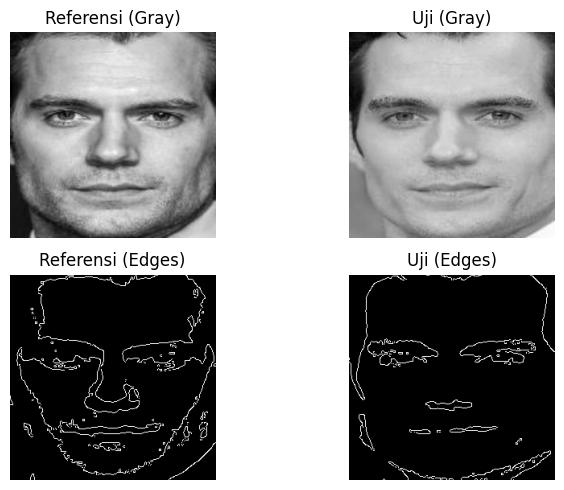

Akurasi antara Hrithik Roshan_10.jpg dan Hrithik Roshan_10.jpg: 100.00%


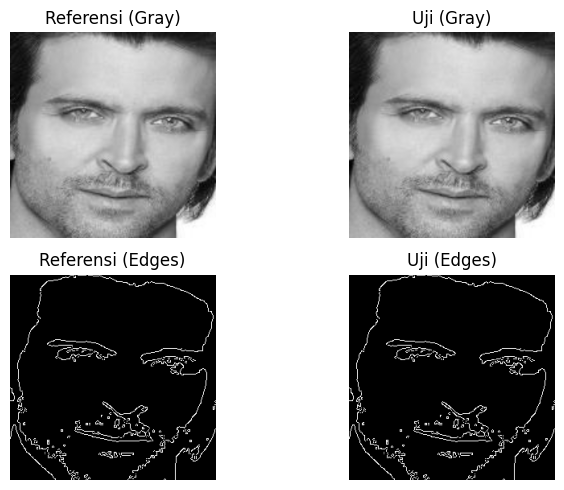

Akurasi antara Hugh Jackman_16.jpg dan Hugh Jackman_100.jpg: 91.42%


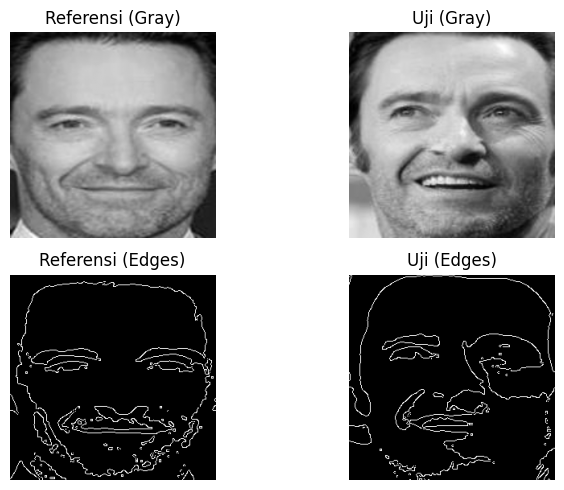

Akurasi antara Jessica Alba_16.jpg dan Jessica Alba_16.jpg: 100.00%


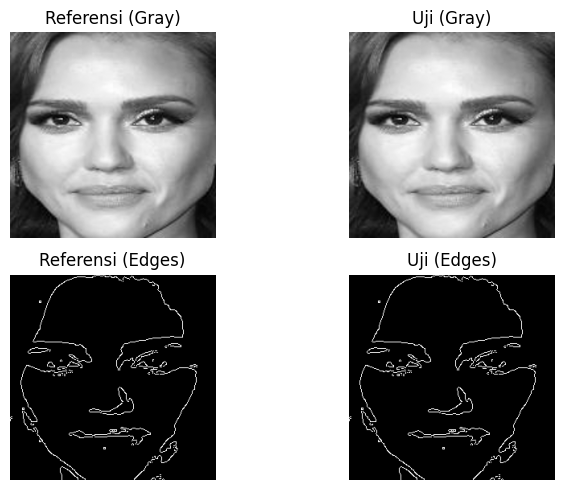

Akurasi antara Lisa Kudrow_16.jpg dan Lisa Kudrow_41.jpg: 91.53%


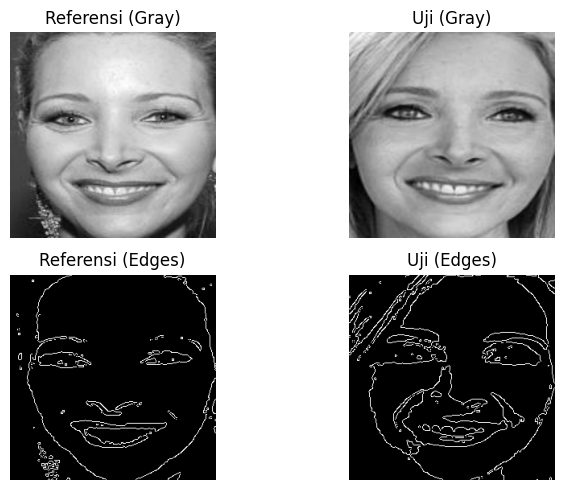

Akurasi antara Margot Robbie_20.jpg dan Margot Robbie_20.jpg: 100.00%


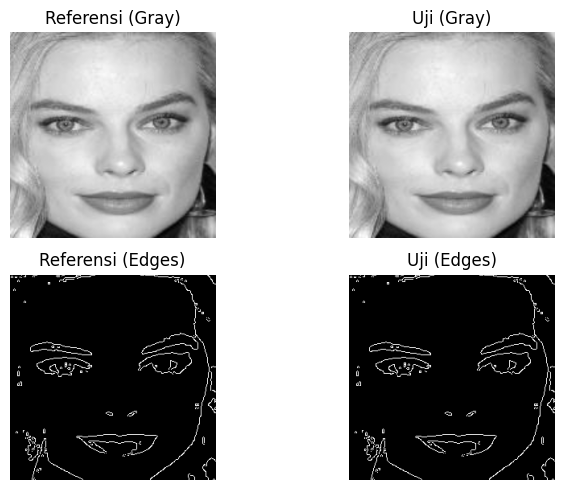

Akurasi antara Natalie Portman_29.jpg dan Natalie Portman_29.jpg: 100.00%


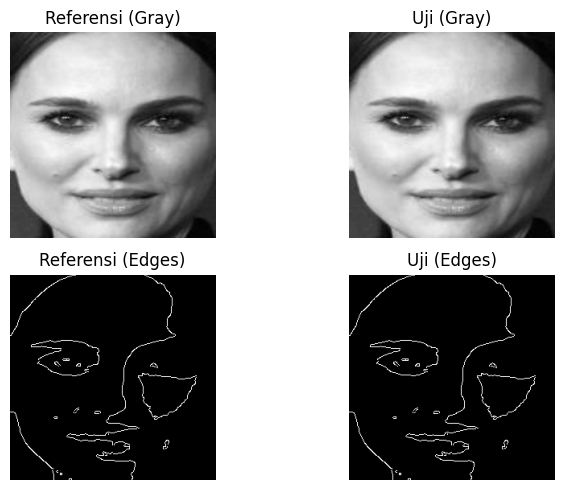

Akurasi antara Robert Downey Jr_3.jpg dan Robert Downey Jr_27.jpg: 92.05%


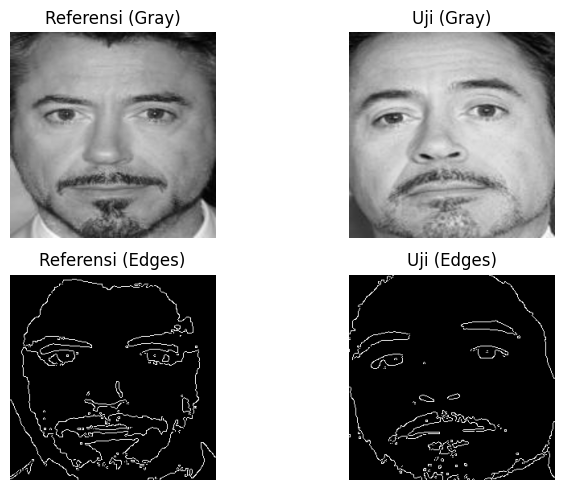

Akurasi antara Tom Cruise_31.jpg dan Tom Cruise_14.jpg: 92.93%


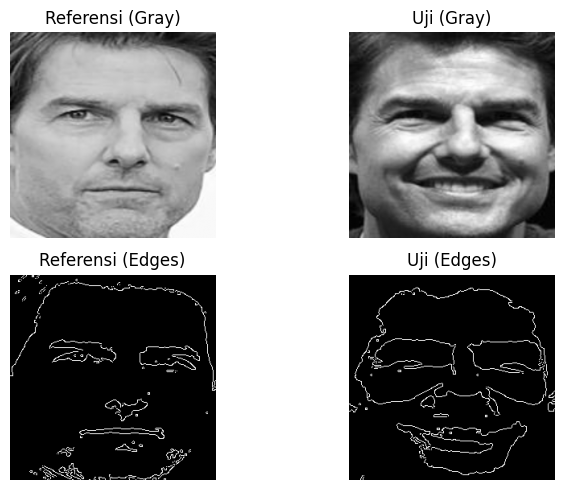

Akurasi antara Zac Efron_10.jpg dan Zac Efron_10.jpg: 100.00%


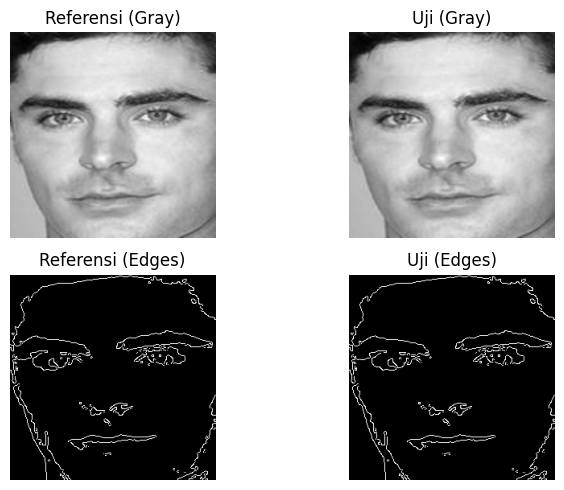

Rata-rata Akurasi: 97.45%


In [19]:
# Path folder di Google Drive atau lokasi lain
reference_folder = "/content/drive/MyDrive/SEMESTER 5/Pengolahan CItra Digital/TB/referensi gambar"
test_folder = "/content/drive/MyDrive/SEMESTER 5/Pengolahan CItra Digital/TB/test gambar"
output_folder = "/content/drive/MyDrive/SEMESTER 5/Pengolahan CItra Digital/TB/canny_output"

# Jalankan perbandingan gambar
compare_images(reference_folder, test_folder, output_folder)
